In [ ]:
# Math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from numpy.random import Generator, PCG64
import random
from scipy.stats import norm
import scipy.optimize as optimize
import time

# Ez parallelization
from joblib import Parallel, delayed

# File Handling
from sys import getsizeof
import _pickle as pickle
# Alternatively use JSON which will be human readable
# import json

# Custom imports
from global_cache import Global_Cache
import base_from_gen as bg
import pricing_func as pf
from path_datatype import Path




In [ ]:
with open("1.6kRunDemo.pkl","rb") as fp:
    paths = pickle.load(fp)

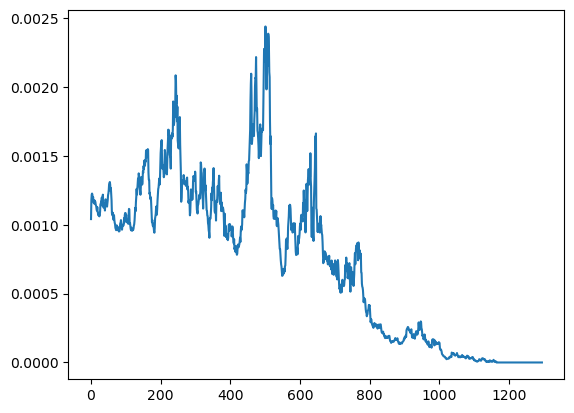

In [8]:
# Try a plot
path = paths[0]
plt.plot(path.CVA)